In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
from IPython.display import display

In [2]:
data = pd.read_csv('../dataset/data_prepared.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


InvoiceNo: Invoice number

In [3]:
data_country = data[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
data_country.reset_index(drop = False,inplace=True)
countries = data_country['Country'].value_counts()

In [4]:
pre_order = pd.DataFrame(data={key:[round(x,2)] for x,key in zip(countries.values/countries.sum()*100,countries.index)})
pre_order

,United Kingdom,Germany,France,EIRE,Belgium,Spain,Netherlands,Switzerland,Portugal,Australia,...,Greece,Czech Republic,European Community,Lithuania,United Arab Emirates,Saudi Arabia,Bahrain,RSA,Lebanon,Brazil
0,89.49,2.72,2.06,1.44,0.54,0.47,0.46,0.32,0.32,0.31,...,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.0,0.0,0.0


In [7]:
pre_order_2 = pd.DataFrame([[key,round(x,2)] for x,key in zip(countries.values/countries.sum()*100,countries.index)],columns=['country','percentage'])
pre_order_2

,country,percentage
0,United Kingdom,89.49
1,Germany,2.72
2,France,2.06
3,EIRE,1.44
4,Belgium,0.54
5,Spain,0.47
6,Netherlands,0.46
7,Switzerland,0.32
8,Portugal,0.32
9,Australia,0.31


In [8]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [9]:
country_plot = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order number.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [country_plot], layout = layout)
iplot(choromap, validate=False)

There a amount number of order from UK

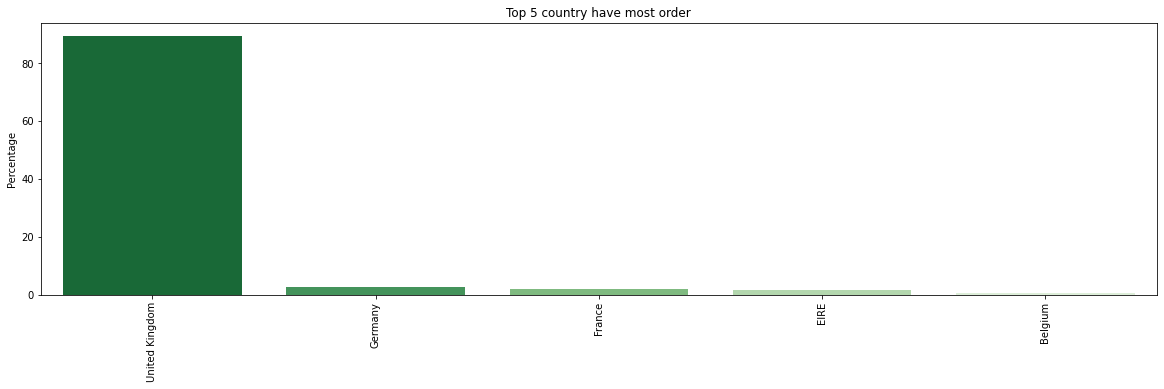

In [10]:
plt.figure(figsize=(20,5))
sns.barplot(pre_order_2['country'][:5].values, pre_order_2['percentage'][:5].values, palette="Greens_r")
plt.ylabel("Percentage")
plt.title("Top 5 country have most order")
plt.xticks(rotation=90)
plt.show()

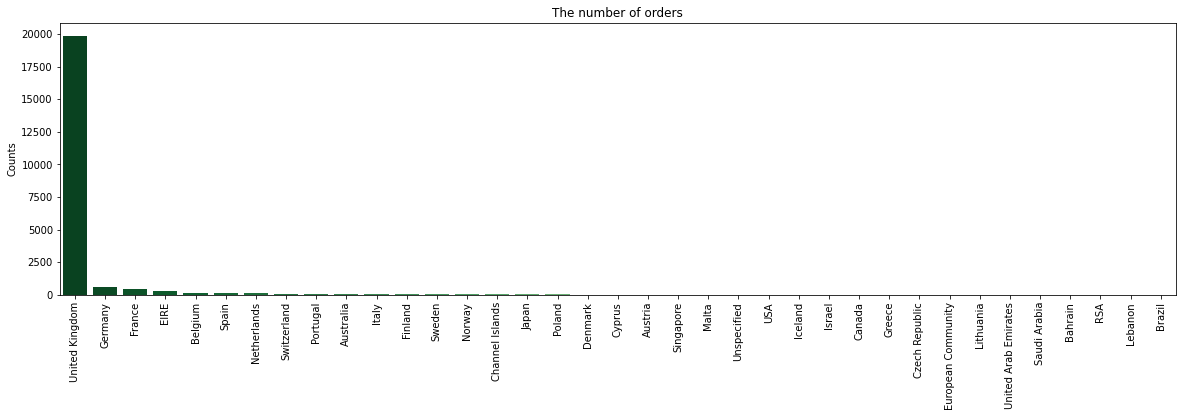

In [12]:
plt.figure(figsize=(20,5))
sns.barplot(countries.index, countries.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("The number of orders")
plt.xticks(rotation=90)
# plt.yscale("log")
plt.show()

Statistical about prodcut, transaction and customer

In [23]:
pd.DataFrame([{'products': len(data['StockCode'].unique()),    
               'transactions': len(data['InvoiceNo'].unique()),
               'customers': len(data['CustomerID'].unique()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372
